In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
adult_data = pd.read_csv('adult.data', header = None, delimiter = ',', na_values = '?', skipinitialspace=True)


In [3]:
adult_data.shape

(32561, 15)

In [4]:
columns = ['age','workclass','fnlwgt','education','education-num',
          'marital-status', 'occupation', 'relationship', 'race', 'sex',
          'capital-gain', 'capital-loss','hours-per-week', 'native-country',
          'income']

In [5]:
adult_data.columns = columns


In [6]:
adult_data.to_csv("adult_income.csv")

In [7]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data Cleaning 

In [8]:
adult_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
adult_data.isnull().sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [10]:
adult_data = adult_data.dropna()
adult_data = adult_data.drop('fnlwgt', 1)
adult_data.shape

(30162, 14)

In [11]:
adult_data['income'] = adult_data['income'].map({'<=50K':0, '>50K':1})

In [12]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null int64
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [13]:
adult_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Understanding the data

In [14]:
income_greater = len(adult_data[adult_data['income'] == 1])
income_lesser = len(adult_data[adult_data['income'] == 0])
print(income_greater, income_lesser) 

7508 22654


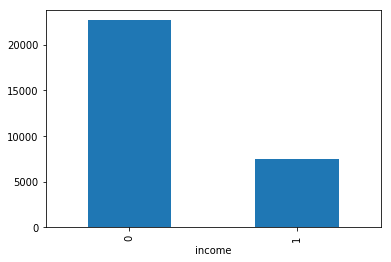

In [15]:
adult_data.groupby(['income']).size().plot(kind='bar')

Appoximately 25% of the customers have income greater than 50k. 

Categorical Analysis 

In [16]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race',
              'native-country']

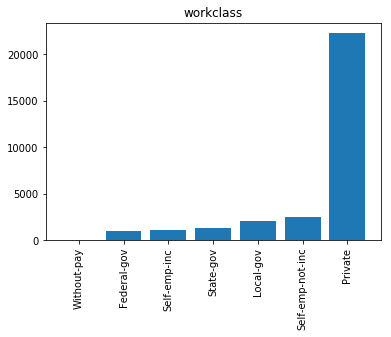

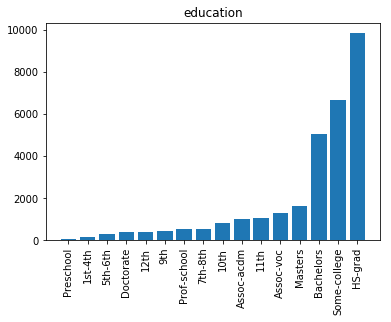

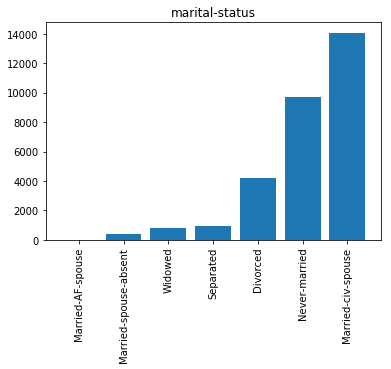

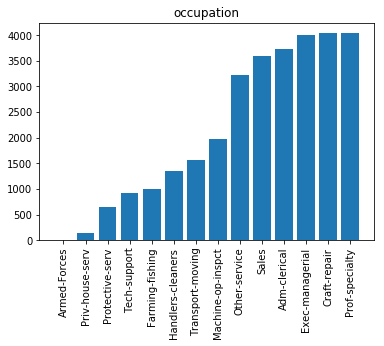

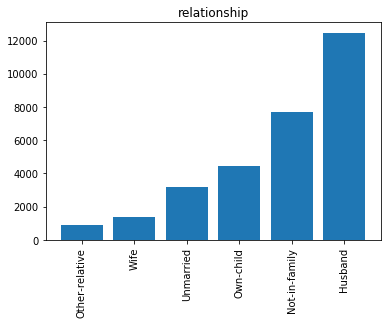

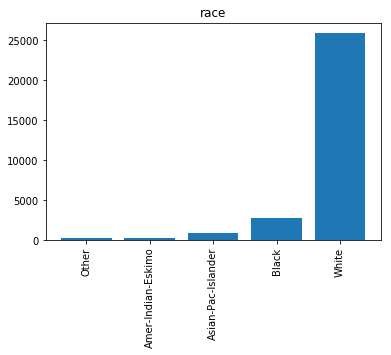

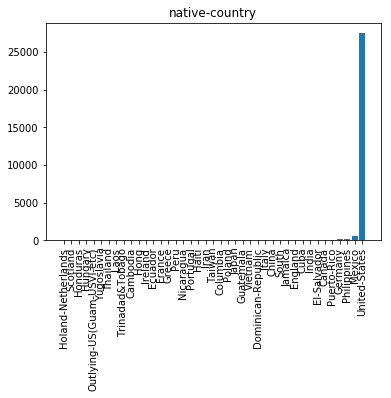

In [17]:
for i in categorical:
    size = adult_data.groupby([i]).size().sort_values()
    x = size.index
    y = size.values
    plt.title(i)
    plt.xticks(rotation='vertical')
    plt.bar(x,y)
    plt.show()

In [18]:
adult_data.groupby(['native-country']).size().sort_values()

native-country
Holand-Netherlands                1
Scotland                         11
Honduras                         12
Hungary                          13
Outlying-US(Guam-USVI-etc)       14
Yugoslavia                       16
Thailand                         17
Laos                             17
Trinadad&Tobago                  18
Cambodia                         18
Hong                             19
Ireland                          24
Ecuador                          27
France                           27
Greece                           29
Peru                             30
Nicaragua                        33
Portugal                         34
Haiti                            42
Iran                             42
Taiwan                           42
Columbia                         56
Poland                           56
Japan                            59
Guatemala                        63
Vietnam                          64
Dominican-Republic               67
Italy        

91% of the customers are from United States. 

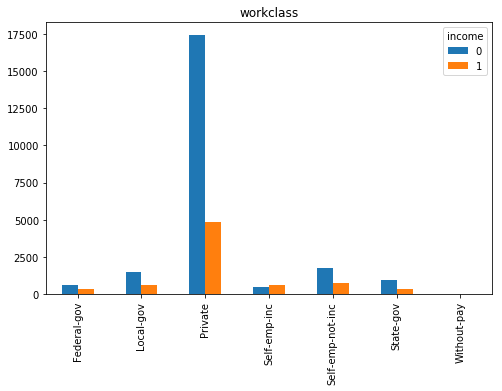

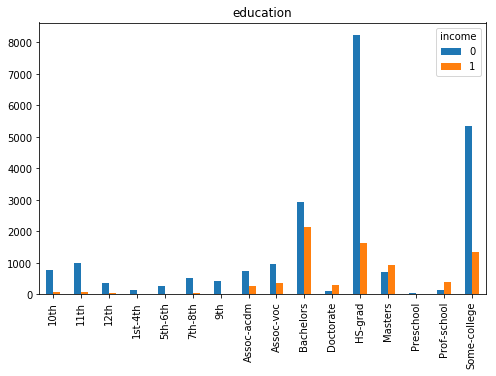

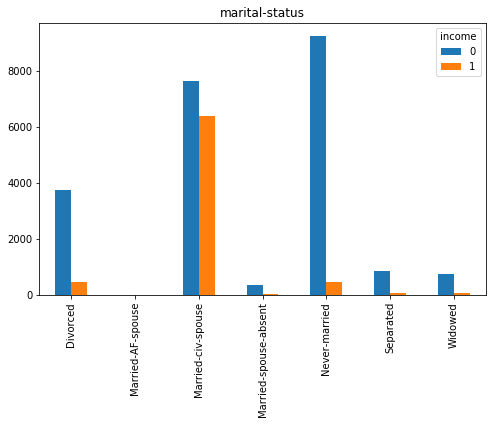

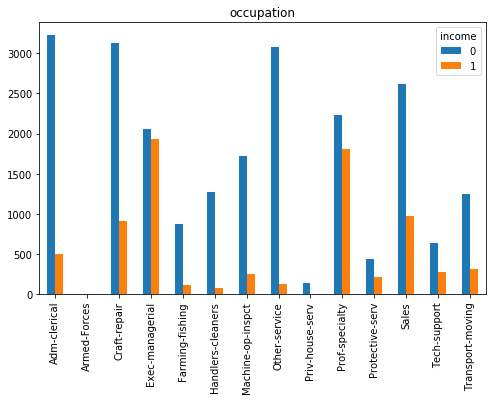

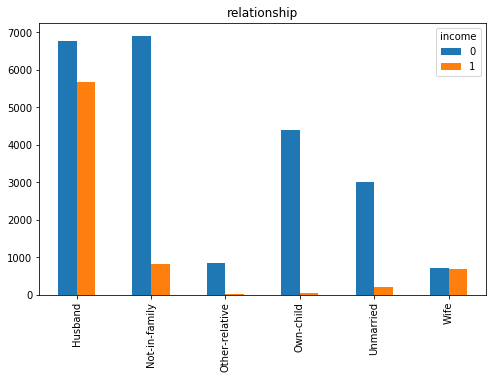

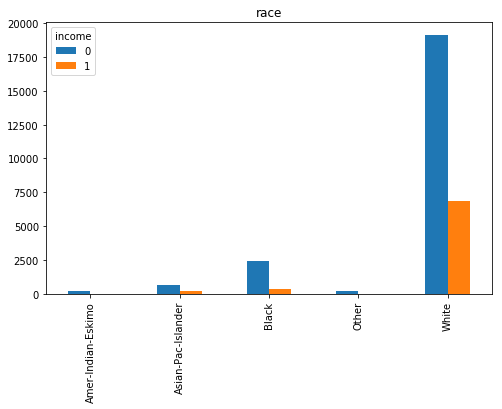

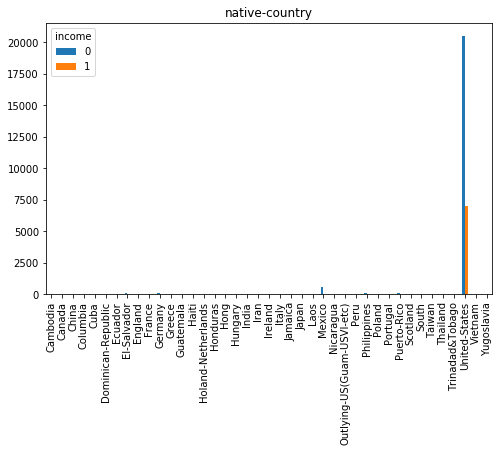

In [19]:
for i in categorical:
    adult_data.groupby(["income",i]).size().unstack("income").plot(kind="bar", figsize=(8,5))
    plt.title(i)
    plt.xlabel("")


In [20]:
adult_data["marital-status"] = adult_data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
adult_data["marital-status"] = adult_data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

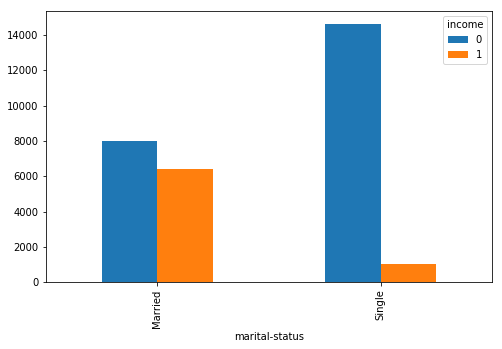

In [21]:
adult_data.groupby(["income","marital-status"]).size().unstack("income").plot(kind='bar',figsize=(8,5))

In [22]:
adult_data["race"] = adult_data["race"].replace(['Amer-Indian-Eskimo','Asian-Pac-Islander','Black','Other'], 'Other')

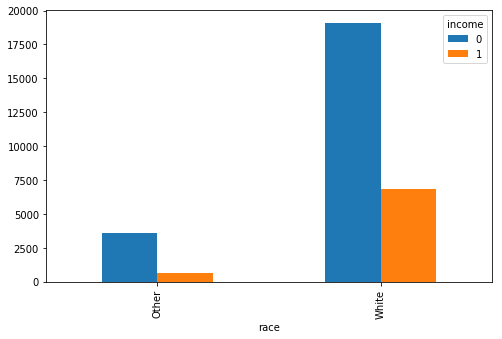

In [23]:
adult_data.groupby(["income","race"]).size().unstack("income").plot(kind='bar',figsize=(8,5))

In [24]:
adult_data.groupby(["income","workclass"]).size().unstack("income")

income,0,1
workclass,,
Federal-gov,578.0,365.0
Local-gov,1458.0,609.0
Private,17410.0,4876.0
Self-emp-inc,474.0,600.0
Self-emp-not-inc,1785.0,714.0
State-gov,935.0,344.0
Without-pay,14.0,NaN


All customers without pay have income less than 50K. 

In [25]:
adult_data.groupby(["income","education"]).size().unstack("income")

income,0,1
education,,
10th,761.0,59.0
11th,989.0,59.0
12th,348.0,29.0
1st-4th,145.0,6.0
5th-6th,276.0,12.0
7th-8th,522.0,35.0
9th,430.0,25.0
Assoc-acdm,752.0,256.0
Assoc-voc,963.0,344.0


All preschoolers have income less than 50K. 

Remove datasets that contain "preschool" or "without-pay" due to complete separation as it perfectly predicts
the dependent variable. 

In [26]:
adult_data = adult_data[adult_data.workclass != 'Without-pay']
adult_data = adult_data[adult_data.workclass != 'Preschool']
adult_data.shape

(30148, 14)

In [27]:
income_greater = len(adult_data[adult_data['income'] == 1])
income_lesser = len(adult_data[adult_data['income'] == 0])
print(income_greater, income_lesser) 

7508 22640


Numerical Analysis

In [28]:
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [29]:
adult_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,30148.000000,30148.000000,30148.000000,30148.000000,30148.000000,30148.000000
mean,38.433561,10.121799,1092.288411,88.413527,40.935054,0.249038
std,13.128876,2.550246,7408.005326,404.387750,11.976033,0.432463
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


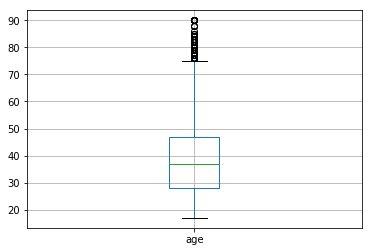

In [30]:
adult_data.boxplot('age')

In [31]:
corr = adult_data.corr()
print(corr)

                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.043725      0.080260      0.060279   
education-num   0.043725       1.000000      0.124419      0.079616   
capital-gain    0.080260       0.124419      1.000000     -0.032238   
capital-loss    0.060279       0.079616     -0.032238      1.000000   
hours-per-week  0.101929       0.152526      0.080451      0.052377   
income          0.242370       0.335247      0.221193      0.150008   

                hours-per-week    income  
age                   0.101929  0.242370  
education-num         0.152526  0.335247  
capital-gain          0.080451  0.221193  
capital-loss          0.052377  0.150008  
hours-per-week        1.000000  0.229443  
income                0.229443  1.000000  


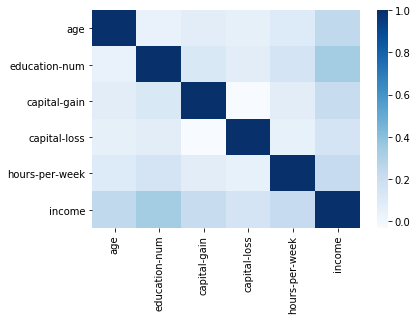

In [32]:
sns.heatmap(corr, cmap="Blues")

Reformatting capital-loss and capital-gain 

In [33]:
df = [] 
for i in adult_data['capital-loss']:
    if i == 0:
        df.append("Low")
    else:
        df.append("High") 
adult_data['capital-loss'] = df

In [34]:
df = [] 
for i in adult_data['capital-gain']:
    if i == 0:
        df.append("Low")
    else:
        df.append("High")  
adult_data['capital-gain'] = df

Creating age-group

In [35]:
df = []
for i in adult_data['age']:
    if i>=17 and i<=26: 
        df.append('17-26')
    elif i>=27 and i<=36:
        df.append('27-36') 
    elif i>=37 and i<=46:
        df.append('37-46')
    elif i>=47 and i<=56:
        df.append('47-56') 
    elif i>=57 and i<=66:
        df.append('57-66')
    elif i>=67 and i<=76:
        df.append('67-76')
    elif i>=77 and i<=86:
        df.append('77-86')
    else:
        df.append('87&above')
adult_data['age-group'] = df  

In [36]:
adult_data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age-group
32556,27,Private,Assoc-acdm,12,Married,Tech-support,Wife,White,Female,Low,Low,38,United-States,0,27-36
32557,40,Private,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,Low,Low,40,United-States,1,37-46
32558,58,Private,HS-grad,9,Single,Adm-clerical,Unmarried,White,Female,Low,Low,40,United-States,0,57-66
32559,22,Private,HS-grad,9,Single,Adm-clerical,Own-child,White,Male,Low,Low,20,United-States,0,17-26
32560,52,Self-emp-inc,HS-grad,9,Married,Exec-managerial,Wife,White,Female,High,Low,40,United-States,1,47-56


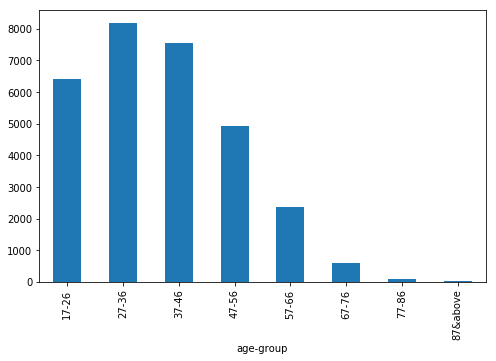

In [37]:
adult_data.groupby(["age-group"]).size().plot(kind="bar", figsize=(8,5))

Encode categorical variable 

In [38]:
adult_data['workclass'] = LabelEncoder().fit_transform(adult_data.workclass)
adult_data['occupation'] = LabelEncoder().fit_transform(adult_data.occupation)
adult_data['native-country'] = LabelEncoder().fit_transform(adult_data['native-country'])
adult_data['relationship'] = LabelEncoder().fit_transform(adult_data.relationship)
adult_data['race'] = LabelEncoder().fit_transform(adult_data.race)
adult_data['age-group'] = LabelEncoder().fit_transform(adult_data['age-group'])
adult_data = adult_data.drop(['education','native-country'],1) 

In [39]:
adult_data['marital-status'] = adult_data['marital-status'].map({'Single':0, 'Married':1}).astype(int)
adult_data['marital-status'] = adult_data['marital-status'].astype(int)
adult_data['sex'] = adult_data['sex'].map({'Male':0, 'Female':1})
adult_data['sex'] = adult_data['sex'].astype(int)
adult_data['capital-gain'] = adult_data['capital-gain'].map({'Low':0, 'High':1})
adult_data['capital-gain'] = adult_data['capital-gain'].astype(int)
adult_data['capital-loss'] = adult_data['capital-loss'].map({'Low':0, 'High':1})
adult_data['capital-loss'] = adult_data['capital-loss'].astype(int)

In [40]:
adult_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,age-group
0,39,5,13,0,0,1,1,0,1,0,40,0,2
1,50,4,13,1,3,0,1,0,0,0,13,0,3
2,38,2,9,0,5,1,1,0,0,0,40,0,2
3,53,2,7,1,5,0,0,0,0,0,40,0,3
4,28,2,13,1,9,5,0,1,0,0,40,0,1


In [41]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30148 entries, 0 to 32560
Data columns (total 13 columns):
age               30148 non-null int64
workclass         30148 non-null int64
education-num     30148 non-null int64
marital-status    30148 non-null int64
occupation        30148 non-null int64
relationship      30148 non-null int64
race              30148 non-null int64
sex               30148 non-null int64
capital-gain      30148 non-null int64
capital-loss      30148 non-null int64
hours-per-week    30148 non-null int64
income            30148 non-null int64
age-group         30148 non-null int64
dtypes: int64(13)
memory usage: 3.2 MB


Logistic Regression

In [42]:
X = adult_data.drop('income', 1) 
y = adult_data[['income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
y_train.groupby(['income']).size()

income
0    18101
1     6017
dtype: int64

In [44]:
LR = LogisticRegression()
fit = LR.fit(X_train, y_train.values.ravel())

/Users/ruien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.403652
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                24118
Model:                          Logit   Df Residuals:                    24106
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.2815
Time:                        21:43:08   Log-Likelihood:                -9735.3
converged:                       True   LL-Null:                       -13549.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.2036      0.005    -44.549      0.000      -0.213      -0.195
workclass         -0.2777      0.019    -14.969      0.000      -0.314      -0.241
education-num      0.2463      0.007     33.292      0.000       0.232       0.261
marital-status     1.9780      0.046     42.986      0.000       1.888       2.068
occupation        -0.0161      0.004     -3.625      0.000      -0.025      -0.007
relationship      -0.0307      0.017     -1.853      0.064      -0.063       0.002
race              -0.3065      0.053     -5.801      0.000      -0.410      -0.203
sex               -0.5197      0.064     -8.126      0.000      -0.645      -0.394
capital-gain       1.7246      0.059     29.140      0.000       1.609       1.841
capital-loss       1.1960      0.074     16.222      0.000       1.051       1.340
hours-per-week     0.0048      0.002      3.133      0.002       0.002       0.008
age-group          2.1258      0.048     44.303      0.000       2.032       2.220
==================================================================================
"""

Only 30% of the variance is explained. This may be due to the unbalanced data. 

In [46]:
y_pred = LR.predict(X_test)
acc_LR = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(acc_LR*100,2), "%")

Logistic Regression Accuracy: 82.74 %


In [47]:
mean_squared_error(y_test, y_pred)

0.172636815920398

In [48]:
adult_data2 = adult_data.drop(['relationship','race'],1) #dropped relationship, race as p-values>0.05 

In [49]:
adult_data2.head()

,age,workclass,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,income,age-group
0,39,5,13,0,0,0,1,0,40,0,2
1,50,4,13,1,3,0,0,0,13,0,3
2,38,2,9,0,5,0,0,0,40,0,2
3,53,2,7,1,5,0,0,0,40,0,3
4,28,2,13,1,9,1,0,0,40,0,1


In [50]:
X2 = adult_data2.drop('income', 1) 
y2 = adult_data2[['income']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [51]:
LR = LogisticRegression()
LR_fit = LR.fit(X2_train, y2_train.values.ravel())

/Users/ruien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
y2_pred = LR.predict(X2_test)
acc_LR2 = accuracy_score(y2_test, y2_pred)
print("Logistic Regression Accuracy:", round(acc_LR2*100,2), "%")

Logistic Regression Accuracy: 82.84 %


In [53]:
mean_squared_error(y2_test, y2_pred)

0.17164179104477612

Cross-validation 

In [54]:
cv_scores = cross_val_score(LR_fit, X, y, cv=10, scoring='accuracy')
print(cv_scores.mean())

/Users/ruien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ruien/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ruien/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruien/anaconda3/lib

0.8287117828244313


Logistic Regression AUC: 88.27 %


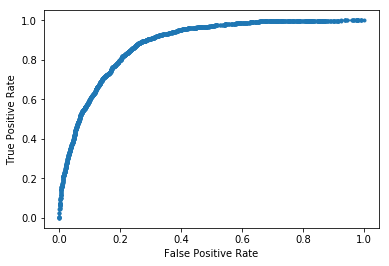

In [55]:
probs_LR = LR.predict_proba(X2_test)
probs_LR = probs_LR[:, 1]
auc_LR = roc_auc_score(y2_test, probs_LR)
fpr_LR, tpr_LR, _ = roc_curve(y_test, probs_LR)
plt.plot(fpr_LR, tpr_LR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("Logistic Regression AUC:", round(auc_LR*100,2), "%")

In [56]:
con_mat = confusion_matrix(y2_test,y2_pred)
con_mat

array([[4194,  345],
       [ 690,  801]])

In [57]:
print("TP =", con_mat[0][0])
print("FN =", con_mat[0][1])
print("FP =", con_mat[1][0])
print("TN =", con_mat[1][1])

TP = 4194
FN = 345
FP = 690
TN = 801


Random Forest 

In [58]:
RF = RandomForestClassifier(n_estimators=100, random_state=24)
RF = RF.fit(X2_train, y2_train.values.ravel())

In [59]:
y_pred = RF.predict(X2_test)
acc_RF = accuracy_score(y2_test, y_pred)
print("Random Forest Accuracy:", round(acc_RF*100,2), "%")

Random Forest Accuracy: 81.21 %


Random Forest AUC: 85.93 %


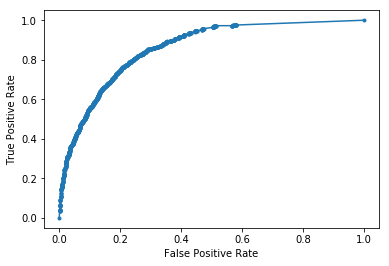

In [60]:
probs_RF = RF.predict_proba(X2_test)
probs_RF = probs_RF[:, 1]
auc_RF = roc_auc_score(y2_test, probs_RF)
fpr_RF, tpr_RF, _ = roc_curve(y2_test, probs_RF)
plt.plot(fpr_RF, tpr_RF, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("Random Forest AUC:", round(auc_RF*100,2), "%")

Decision Tree

In [61]:
DT = DecisionTreeClassifier()
DT = DT.fit(X2_train,y2_train)

In [62]:
y_pred = DT.predict(X2_test)
acc_DT = accuracy_score(y2_test, y_pred)
print("Decision Tree Accuracy:", round(acc_DT*100,2), "%")

Decision Tree Accuracy: 78.47 %


Decision Tree AUC: 72.54 %


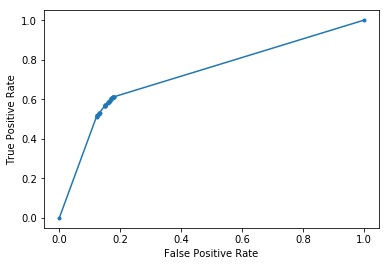

In [63]:
probs_DT = DT.predict_proba(X2_test)
probs_DT = probs_DT[:, 1]
auc_DT = roc_auc_score(y2_test, probs_DT)
fpr_DT, tpr_DT, _ = roc_curve(y2_test, probs_DT)
plt.plot(fpr_DT, tpr_DT, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("Decision Tree AUC:", round(auc_DT*100,2), '%')

Comparison between 3 models 

In [64]:
df = pd.DataFrame()
df['model'] = ['Logistic Regression', 'Random Forest', 'Decision Tree']
df['Accuracy'] = [acc_LR, acc_RF, acc_DT]
df['AUC'] = [auc_LR, auc_RF, auc_DT]

In [65]:
df.set_index('model')

,Accuracy,AUC
model,,
Logistic Regression,0.827363,0.882713
Random Forest,0.812106,0.859325
Decision Tree,0.784743,0.725390
